# HW2 – Machine Learning in Healthcare 336546

Submitted by: Aseel Nama 319112272 and Lilach Barkat 307902270 

This assignment relates to the detection of Type 1 Diabetes (T1D) from a simple yes/no questionnaire, asking patients about their medical history. Your goal is to predict if a patient has T1D by applying ML algorithms on this dataset.

#### Type 1 Diabetes (also known as juvenile diabetes)
T1D is a chronic condition resulting from a lack of insulin in the body. The disease typically presents in early childhood or adolescence. Up to 0.33% of the global population suffers from T1D, making it a world-wide and wide-spread issue. There is no cure and the current treatment is to control blood glucose levels through glucose monitoring, insulin injections, diet, and lifestyle modifications to prevent complications.
The exact cause of T1D is a mystery; however, there are few possible causes such as genetics, autoimmune dysfunction or environmental factors such as some kind of viruses.
Credit: https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/symptoms-causes/syc-20353011

#### Assignment
This assignment has no prebuilt notebook. You are required to build and present an appropriate notebook to show your experiments and results. Please provide all answers within the notebook (in a markdown cell), labeled carefully based on the question number. In this assignment, you will do the following:
* Explore the data provided.
* Implement linear and non-linear classifiers.
* Model optimization with k-fold cross validation
* Evaluate your model performances with appropriate metrics.
* Present a 2d visualization of multi-featured data.
* Use feature selection tools.

## Coding Assignment (72%)

The data for this exercise can be found in the attached file named HW2_data.csv. There are 565 patients in the database. The nurse who collected the data said that not all patients answered all the questions.

#### 1) Load the data. Explain any preprocessing. (5%)

In [32]:
import pandas as pd 
import numpy as np
import random
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, average_precision_score, precision_score,recall_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%matplotlib inline

np.random.seed(42) # to make this notebook's output stable across runs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
T1D = pd.read_csv('HW2_data.csv')  # load the data
T1D.sample(10) # display the data

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
538,45,Female,No,No,No,No,NaN,No,Yes,NaN,No,No,Yes,NaN,No,No,Positive,1
523,85,Male,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive,1
234,47,Female,No,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes,No,No,Positive,1
524,34,Male,No,NaN,No,No,No,No,No,No,No,No,No,No,No,No,Negative,1
486,61,Female,Yes,No,No,No,Yes,No,No,No,Yes,No,No,No,Yes,No,Positive,1
318,69,Female,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Positive,0
247,39,Female,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Positive,1
496,53,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative,0
390,35,Female,Yes,Yes,No,Yes,No,No,Yes,No,No,No,No,No,No,No,Positive,1
222,50,Female,Yes,Yes,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Positive,1


In [3]:
T1D.info() 
# Conclusions:
# Most of the values are object type except Age and Family History 
# Some columns have missing values. The relative proportion of missing values is small.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  565 non-null    int64 
 1   Gender               565 non-null    object
 2   Increased Urination  565 non-null    object
 3   Increased Thirst     545 non-null    object
 4   Sudden Weight Loss   556 non-null    object
 5   Weakness             565 non-null    object
 6   Increased Hunger     552 non-null    object
 7   Genital Thrush       551 non-null    object
 8   Visual Blurring      565 non-null    object
 9   Itching              554 non-null    object
 10  Irritability         565 non-null    object
 11  Delayed Healing      565 non-null    object
 12  Partial Paresis      565 non-null    object
 13  Muscle Stiffness     550 non-null    object
 14  Hair Loss            565 non-null    object
 15  Obesity              565 non-null    object
 16  Diagnosi

In [4]:
T1D_nan = T1D.copy()
T1D_nan.isna().sum()/T1D.shape[0] # fraction of None values

Age                    0.000000
Gender                 0.000000
Increased Urination    0.000000
Increased Thirst       0.035398
Sudden Weight Loss     0.015929
Weakness               0.000000
Increased Hunger       0.023009
Genital Thrush         0.024779
Visual Blurring        0.000000
Itching                0.019469
Irritability           0.000000
Delayed Healing        0.000000
Partial Paresis        0.000000
Muscle Stiffness       0.026549
Hair Loss              0.000000
Obesity                0.000000
Diagnosis              0.000000
Family History         0.000000
dtype: float64

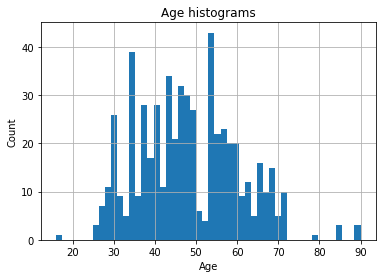

In [5]:
ax = T1D['Age'].hist(bins=50)  # histograms of the Age variable
ax.set_xlabel('Age')
ax.set_ylabel("Count")
ax.set_title("Age histograms")
plt.show()

# Conclusion:
# It seems there isn't non-realistic values
# The data is normaly distributed over the range of 25-70

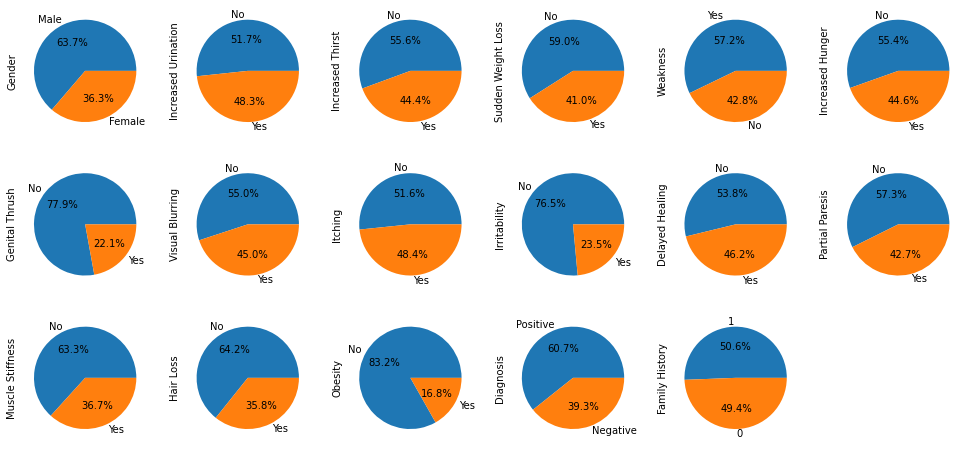

In [6]:
i=1
plt.figure(figsize=(17, 8))
for col in T1D.drop(columns='Age').columns:
    plt.subplot(3, 6, i)
    T1D[col].value_counts().plot(kind="pie", autopct='%1.1f%%') 
    i+=1
    
# Conclusion:
# All the variables except Age are binary without any mistakes such as typos

In [7]:
T1D = T1D.dropna()
T1D.info() # We now have left with 523 patient records

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 0 to 564
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  523 non-null    int64 
 1   Gender               523 non-null    object
 2   Increased Urination  523 non-null    object
 3   Increased Thirst     523 non-null    object
 4   Sudden Weight Loss   523 non-null    object
 5   Weakness             523 non-null    object
 6   Increased Hunger     523 non-null    object
 7   Genital Thrush       523 non-null    object
 8   Visual Blurring      523 non-null    object
 9   Itching              523 non-null    object
 10  Irritability         523 non-null    object
 11  Delayed Healing      523 non-null    object
 12  Partial Paresis      523 non-null    object
 13  Muscle Stiffness     523 non-null    object
 14  Hair Loss            523 non-null    object
 15  Obesity              523 non-null    object
 16  Diagnosi

#### 2) Perform a test-train split of 20% test. (5%)

In [63]:
X = T1D.drop(columns='Diagnosis')
y = T1D['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### 3) Provide a detailed visualization and exploration of the data. (10%)

a. An analysis to show that the distribution of the features is similar between test and train. See table 1 below.
    i. What issues could an imbalance of features between train and test cause?
    ii. How could you solve the issue?

In [64]:
X_train_d = pd.get_dummies(data=X_train, drop_first=True)
X_test_d = pd.get_dummies(data=X_test, drop_first=True)

train_test_distribution = pd.DataFrame()
train_test_distribution['Train %'] = X_train_d.sum(axis=0)/X_train_d.count() *100
train_test_distribution['Test %'] = X_test_d.sum(axis=0)/X_test_d.count() *100
train_test_distribution['Delta %'] = train_test_distribution['Train %'] - train_test_distribution['Test %']
train_test_distribution.drop('Age', axis=0).round()

# The data is pretty balance

,Train %,Test %,Delta %
Family History,49.0,57.0,-8.0
Gender_Male,63.0,62.0,1.0
Increased Urination_Yes,50.0,49.0,1.0
Increased Thirst_Yes,45.0,41.0,5.0
Sudden Weight Loss_Yes,41.0,44.0,-3.0
Weakness_Yes,58.0,59.0,-1.0
Increased Hunger_Yes,46.0,45.0,1.0
Genital Thrush_Yes,23.0,20.0,3.0
Visual Blurring_Yes,45.0,43.0,2.0
Itching_Yes,49.0,46.0,4.0


b. Plots to show the relationship between feature and label. See Figure 1 below.

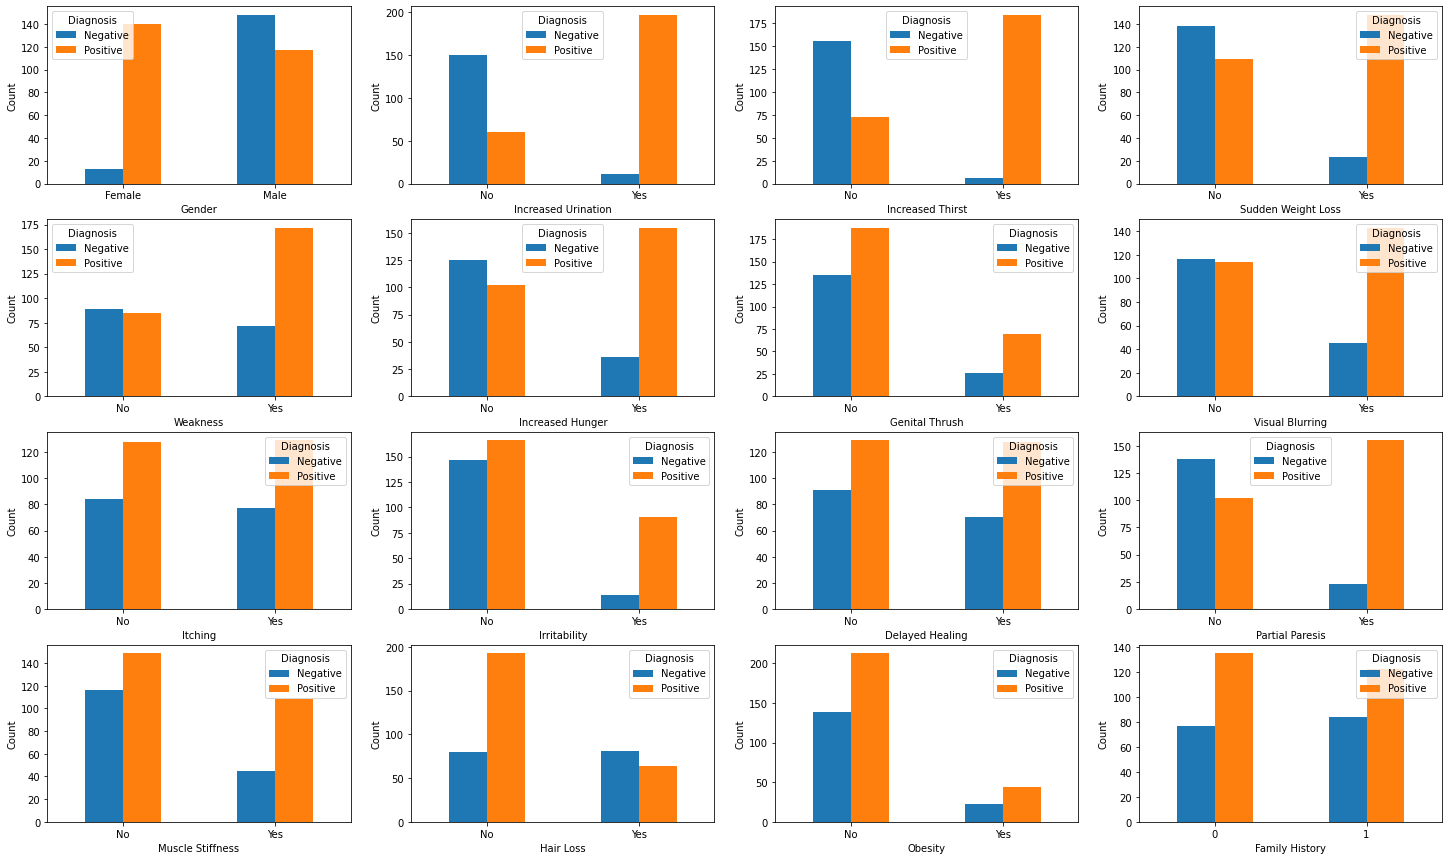

In [65]:
train_with_outcome = X_train.copy()
train_with_outcome['Diagnosis'] = y_train

i=1
plt.figure(figsize=(25, 15))
for col in train_with_outcome.drop(columns=['Age','Diagnosis']).columns:
    ax = plt.subplot(4, 4, i)
    train_with_outcome[[col,'Diagnosis']].groupby(col)['Diagnosis'].value_counts().unstack().plot.bar(ax=ax, rot=0, ylabel='Count')
    i+=1

We can see from the bar plots some features that have high seperation between the negative and positive Diagnosis. It seems that Gender, Increased Urination and Increased Thirst have strong potential for diagnosis indication.  

c. Additional plots that make sense given the mostly binary nature of this dataset.

<AxesSubplot:>

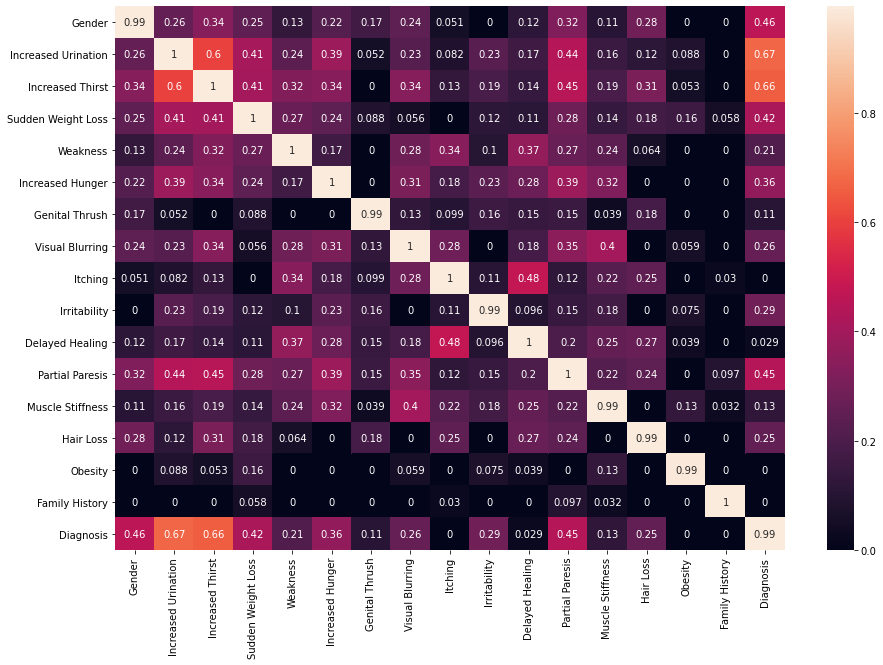

In [66]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v_matrix = pd.DataFrame()
for c1 in train_with_outcome.drop(columns=['Age']).columns:
    for c2 in train_with_outcome.drop(columns=['Age']).columns:
        cramers_v_matrix.loc[c1,c2] =  cramers_v(train_with_outcome[c1],train_with_outcome[c2])
    
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cramers_v_matrix, annot=True)

# Credit: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

d. State any insights you have

i. Was there anything unexpected?

ii. Are there any features that you feel will be particularly important to your model? Explain why.

##### Our answer:
- The data is pretty balance and 
- All the variables except Age are binary without any mistakes such as typos.
- The relative proportion of missing values is small.
- The data is normaly distributed over the range of 25-70

i. We would expect to see more influance to family history and obesity and less influance for the gender feature.

ii. The most important features according to cramers_v score are Increased Urination, Increased Thirst, Gender, Sudden Weight Loss and Partial Paresis

#### 4) Encode all your data as one hot vectors. (5%)

In [67]:
# # One Hot incoder
X_train = pd.get_dummies(data=X_train, drop_first=True)
y_train = pd.get_dummies(data=y_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)
y_test = pd.get_dummies(data=y_test, drop_first=True)
X_train

,Age,Family History,Gender_Male,Increased Urination_Yes,Increased Thirst_Yes,Sudden Weight Loss_Yes,Weakness_Yes,Increased Hunger_Yes,Genital Thrush_Yes,Visual Blurring_Yes,Itching_Yes,Irritability_Yes,Delayed Healing_Yes,Partial Paresis_Yes,Muscle Stiffness_Yes,Hair Loss_Yes,Obesity_Yes
406,40,0,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0
199,68,1,1,1,1,0,0,1,0,1,1,1,0,1,0,0,0
85,38,0,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0
312,40,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0
166,59,1,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,57,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0
270,38,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190,60,0,0,1,1,1,1,1,0,1,1,0,0,1,1,0,0
223,38,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


#### 5) Choose, build and optimize Machine Learning Models: (20%)
1. Use 5k cross fold validation and tune the models to achieve the highest test AUC:
    1. Train one or more linear model on your training set
    1. Train one or more non-linear models on your training set
1. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS, ACC).

In [68]:
def statistics(y_test, y_pred, ModelName, hyperparameters):
    fpr2, tpr2, threshold = metrics.roc_curve(y_test, y_pred) #True positive rate and true negative rate
    auc_score = metrics.auc(fpr2, tpr2)
    f1_score = metrics.f1_score(y_test, y_pred, average=None)[1]
    acc_score = accuracy_score(y_test, y_pred)
    results = {'ModelName': ModelName, 'hyperparameters':hyperparameters, 'Accurecy': acc_score, 'AUC': auc_score,'F1': f1_score}
    return results

In [69]:
def cross_validation(X, y, model, hyperparameters_grid, num_folds=5):
    auc_scores = []
    for i, h in enumerate(hyperparameters_grid):

        N = len(X)
        indices = np.array(range(N))
        fold_ratio = 1/num_folds
        ratio = int(np.floor(fold_ratio * N))
        np.random.shuffle(indices)
        mask = np.zeros(N,dtype=bool)
        
        folds_auc=[]
        for n in range(num_folds):  
            mask[:] = False
            mask[ratio*n:ratio*(n+1)] = True
            valid_ind = indices[mask] 
            train_ind = indices[~mask]
            x_valid, y_valid = X[valid_ind], y[valid_ind]
            x_train, y_train = X[train_ind], y[train_ind]

            m = model(**h)
            try:
                m = m.fit(x_train,y_train)
            except:
                folds_auc.append(0)
                continue
            y_valid_pred = m.predict(x_valid)
            fpr2, tpr2, _ = metrics.roc_curve(y_valid, y_valid_pred)
            auc_score = metrics.auc(fpr2, tpr2)
            folds_auc.append(auc_score)
        auc_scores.append(folds_auc)

    best_h_idx = np.argmax([np.mean(auc) for auc in auc_scores])
    best_h = hyperparameters_grid[best_h_idx]

    return best_h, auc_scores

In [99]:
def run_model(model, ModelName, param_grid, data):
    X_train, y_train, X_test, y_test = data
    try:
        X_train = X_train.values
    except:
        pass
        
    hyperparameters_grid = list(ParameterGrid(param_grid))
    best_h, auc_scores = cross_validation(X_train, y_train.values.ravel(), 
                                          model, hyperparameters_grid, num_folds=5)

    m = model(**best_h)
    m.fit(X_train, y_train.values.ravel())
    y_pred = m.predict(X_test)
    results = statistics(y_test, y_pred, ModelName=ModelName, hyperparameters=best_h)
    return results

In [71]:
data = (X_train, y_train, X_test, y_test)

#####  Logistic Regression

In [17]:
param_grid = {'penalty':['l1', 'l2'], #specify the norm used in the penalization
              'C': [0.1, 0.5, 1, 5, 10, 15, 20], #smaller values specify stronger regularization
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'fit_intercept':[False]}

run_model(LogisticRegression, ModelName='Logistic Regression', param_grid=param_grid, data=data)

{'ModelName': 'Logistic Regression',
 'hyperparameters': {'C': 15,
  'fit_intercept': False,
  'penalty': 'l2',
  'solver': 'liblinear'},
 'Accurecy': 0.9047619047619048,
 'AUC': 0.8999618902439024,
 'F1': 0.921875}

##### Linear SVM 

In [18]:
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 15, 20], #Regularization parameter
              'kernel':['linear']}

run_model(svm.SVC, ModelName='Linear SVM', param_grid=param_grid, data=data)

{'ModelName': 'Linear SVM',
 'hyperparameters': {'C': 0.1, 'kernel': 'linear'},
 'Accurecy': 0.9047619047619048,
 'AUC': 0.9043445121951219,
 'F1': 0.9206349206349206}

##### nonlinear SVM rbf kernel

In [19]:
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 15, 20], #Regularization parameter
              'kernel':['rbf'],
              'gamma':['auto']}

run_model(svm.SVC, ModelName='nonlinear SVM', param_grid=param_grid, data=data)

{'ModelName': 'nonlinear SVM',
 'hyperparameters': {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'},
 'Accurecy': 0.9809523809523809,
 'AUC': 0.9799923780487805,
 'F1': 0.984375}

##### nonlinear SVM poly kernel

In [20]:
param_grid = {'C': [1, 5, 10], #Regularization parameter
              'kernel':['poly'],
              'gamma':['auto'],
              'degree':[2,3,4]}

run_model(svm.SVC, ModelName='nonlinear SVM', param_grid=param_grid, data=data)

{'ModelName': 'nonlinear SVM',
 'hyperparameters': {'C': 5, 'degree': 3, 'gamma': 'auto', 'kernel': 'poly'},
 'Accurecy': 0.9523809523809523,
 'AUC': 0.9434070121951219,
 'F1': 0.9618320610687023}

##### nonlinear SVM sigmoid kernel

In [21]:
param_grid = {'C': [0.1, 0.5, 1, 5, 10, 15, 20], #Regularization parameter
              'kernel':['sigmoid'],
              'gamma':['auto']}

run_model(svm.SVC, ModelName='nonlinear SVM', param_grid=param_grid, data=data)

{'ModelName': 'nonlinear SVM',
 'hyperparameters': {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'},
 'Accurecy': 0.6095238095238096,
 'AUC': 0.5,
 'F1': 0.7573964497041421}

#####  KNN 

In [22]:
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 10, 20]} #Regularization parameter

run_model(KNeighborsClassifier, ModelName='KNN', param_grid=param_grid, data=data)

{'ModelName': 'KNN',
 'hyperparameters': {'n_neighbors': 3},
 'Accurecy': 0.8857142857142857,
 'AUC': 0.9018673780487805,
 'F1': 0.8983050847457628}

c. What performs best on this dataset? Linear or non-linear models?

##### Our answer:
We got the best score by using the nonlinear SVM rbf kernel - Accurecy of 0.98 and AUC of 0.98.

#### 6) Feature Selection (10%)

1. As seen previously, a Random Forest Network can be used to explore feature importance. Train a Random Forest on your data.
    1. What are the 2 most important features according to the random forest.
    1. Does this match up exactly with the feature exploration you did?

#####  RandomForestClassifier 

In [23]:
model = RandomForestClassifier(n_estimators=100, max_depth= None, bootstrap = True, criterion= 'entropy', oob_score = True, n_jobs = -1, min_samples_split=5)
hyperparameters = {'n_estimators':100, 'max_depth': None, 'criterion':'entropy'}
model.fit(X_train.values, y_train.values.ravel())
y_pred = model.predict(X_test)
results = statistics(y_test, y_pred, ModelName='RandomForestClassifier',hyperparameters=hyperparameters)
results

{'ModelName': 'RandomForestClassifier',
 'hyperparameters': {'n_estimators': 100,
  'max_depth': None,
  'criterion': 'entropy'},
 'Accurecy': 0.9523809523809523,
 'AUC': 0.9477896341463414,
 'F1': 0.9612403100775193}

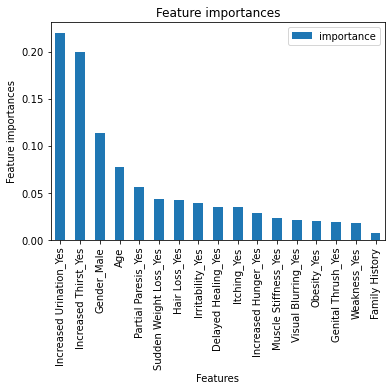

In [24]:
feature_importances = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
ax = feature_importances.plot.bar()
ax.set_xlabel('Features')
ax.set_ylabel("Feature importances")
ax.set_title("Feature importances")
plt.show()

##### Our answer:
The two most important features are **Increased Thirst** and **Increased Urination** and  it does match up exactly with the feature exploration we did.


#### 7) Data Separability Visualization: (20%)
1. Perform dimensionality reduction on the dataset so that you can plot your data in a 2d plot (show samples with positive and negative labels in different colors).
1. How separable is your data when reduced to just two features?
1. Train the same models above on the dimensionality-reduced training set.
1. Train the same models on the best two features from section 6.
1. What performs better? 2 features or the reduced dimensionality.

In [91]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# Compute a PCA
n_components = X_train_s.shape[1]
pca = PCA(n_components=n_components, whiten=True)

# apply PCA transformation
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

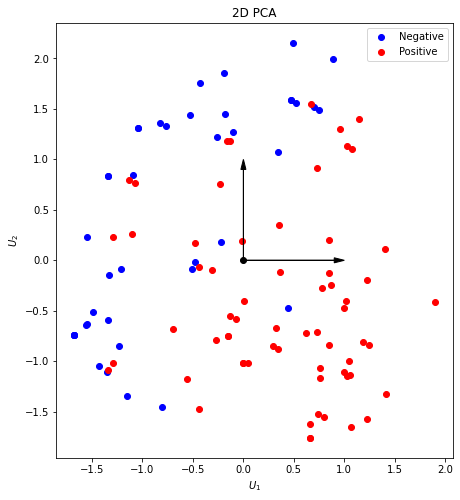

In [93]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

plt_2d_pca(X_test_pca,y_test.values.ravel())

##### Our answer:
It seems that our data is pretty separable while the positive diagnosis is on the right of the plot and the negative at the left side.

In [94]:
model_dictionary = [{'model':LogisticRegression, 
                     'ModelName':'Logistic Regression', 
                     'param_grid':{'penalty':['l1', 'l2'], #specify the norm used in the penalization
                                   'C': [0.1, 0.5, 1, 5, 10, 15, 20], #smaller values specify stronger regularization
                                   'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                                   'fit_intercept':[False]}},
                    {'model':svm.SVC, 
                     'ModelName':'Linear SVM', 
                     'param_grid':{'C': [0.1, 0.5, 1, 5, 10, 15, 20], #Regularization parameter
                                   'kernel':['linear']}},
                    {'model':svm.SVC, 
                     'ModelName':'nonlinear SVM', 
                     'param_grid':{'C': [0.1, 0.5, 1, 5, 10, 15, 20], #Regularization parameter
                                   'kernel':['rbf'],
                                   'gamma':['auto']}},
                    {'model':svm.SVC, 
                     'ModelName':'nonlinear SVM', 
                     'param_grid':{'C': [0.1, 0.5, 1, 5, 10, 15, 20], #Regularization parameter
                                   'kernel':['sigmoid'],
                                   'gamma':['auto']}},
                    {'model':KNeighborsClassifier, 
                     'ModelName':'KNN', 
                     'param_grid':{'n_neighbors': [2, 3, 4, 5, 6, 10, 20]}}, #Regularization parameter
                    {'model':RandomForestClassifier, 
                     'ModelName':'RandomForestClassifier', 
                     'param_grid':{'n_estimators':[100],
                                   'max_depth': [None],
                                   'bootstrap':[True],
                                   'criterion':['entropy'],
                                   'oob_score':[True],
                                   'n_jobs':[-1],
                                   'min_samples_split':[5]}},
                   ]

##### The same models on all the data

In [26]:
data = (X_train, y_train, X_test, y_test)

all_data_results = []
for model in model_dictionary:
    all_data_results.append(run_model(**model, data=data))

all_data_results

[{'ModelName': 'Logistic Regression',
  'hyperparameters': {'C': 15,
   'fit_intercept': False,
   'penalty': 'l1',
   'solver': 'liblinear'},
  'Accurecy': 0.9047619047619048,
  'AUC': 0.8999618902439024,
  'F1': 0.921875},
 {'ModelName': 'Linear SVM',
  'hyperparameters': {'C': 15, 'kernel': 'linear'},
  'Accurecy': 0.9047619047619048,
  'AUC': 0.9043445121951219,
  'F1': 0.9206349206349206},
 {'ModelName': 'nonlinear SVM',
  'hyperparameters': {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'},
  'Accurecy': 0.9809523809523809,
  'AUC': 0.9799923780487805,
  'F1': 0.984375},
 {'ModelName': 'nonlinear SVM',
  'hyperparameters': {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'},
  'Accurecy': 0.6095238095238096,
  'AUC': 0.5,
  'F1': 0.7573964497041421},
 {'ModelName': 'KNN',
  'hyperparameters': {'n_neighbors': 5},
  'Accurecy': 0.8666666666666667,
  'AUC': 0.8862423780487805,
  'F1': 0.8793103448275861},
 {'ModelName': 'RandomForestClassifier',
  'hyperparameters': {'bootstrap': True,
   'cr

##### The same models on the dimensionality-reduced training set

In [100]:
data = (X_train_pca, y_train, X_test_pca, y_test)

dimensionality_reduced_results = []
for model in model_dictionary:
    dimensionality_reduced_results.append(run_model(**model, data=data))

dimensionality_reduced_results

[{'ModelName': 'Logistic Regression',
  'hyperparameters': {'C': 0.1,
   'fit_intercept': False,
   'penalty': 'l2',
   'solver': 'liblinear'},
  'Accurecy': 0.8380952380952381,
  'AUC': 0.8671875,
  'F1': 0.8468468468468469},
 {'ModelName': 'Linear SVM',
  'hyperparameters': {'C': 0.1, 'kernel': 'linear'},
  'Accurecy': 0.8952380952380953,
  'AUC': 0.896532012195122,
  'F1': 0.9120000000000001},
 {'ModelName': 'nonlinear SVM',
  'hyperparameters': {'C': 20, 'gamma': 'auto', 'kernel': 'rbf'},
  'Accurecy': 0.9714285714285714,
  'AUC': 0.9634146341463415,
  'F1': 0.9770992366412213},
 {'ModelName': 'nonlinear SVM',
  'hyperparameters': {'C': 0.5, 'gamma': 'auto', 'kernel': 'sigmoid'},
  'Accurecy': 0.8380952380952381,
  'AUC': 0.8277439024390244,
  'F1': 0.8682170542635659},
 {'ModelName': 'KNN',
  'hyperparameters': {'n_neighbors': 3},
  'Accurecy': 0.9333333333333333,
  'AUC': 0.936547256097561,
  'F1': 0.944},
 {'ModelName': 'RandomForestClassifier',
  'hyperparameters': {'bootstrap'

##### The same models on the best two features from section 6

In [27]:
data = (X_train[['Increased Thirst_Yes', 'Increased Urination_Yes']], y_train,
        X_test[['Increased Thirst_Yes', 'Increased Urination_Yes']], y_test)

best_two_features_results = []
for model in model_dictionary:
    best_two_features_results.append(run_model(**model, data=data))

best_two_features_results

[{'ModelName': 'Logistic Regression',
  'hyperparameters': {'C': 1,
   'fit_intercept': False,
   'penalty': 'l1',
   'solver': 'saga'},
  'Accurecy': 0.8380952380952381,
  'AUC': 0.8408917682926829,
  'F1': 0.8617886178861789},
 {'ModelName': 'Linear SVM',
  'hyperparameters': {'C': 0.5, 'kernel': 'linear'},
  'Accurecy': 0.8380952380952381,
  'AUC': 0.8408917682926829,
  'F1': 0.8617886178861789},
 {'ModelName': 'nonlinear SVM',
  'hyperparameters': {'C': 15, 'gamma': 'auto', 'kernel': 'rbf'},
  'Accurecy': 0.8380952380952381,
  'AUC': 0.8408917682926829,
  'F1': 0.8617886178861789},
 {'ModelName': 'nonlinear SVM',
  'hyperparameters': {'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'},
  'Accurecy': 0.8380952380952381,
  'AUC': 0.8408917682926829,
  'F1': 0.8617886178861789},
 {'ModelName': 'KNN',
  'hyperparameters': {'n_neighbors': 6},
  'Accurecy': 0.7619047619047619,
  'AUC': 0.795922256097561,
  'F1': 0.766355140186916},
 {'ModelName': 'RandomForestClassifier',
  'hyperparameters'

5. What performs better? 2 features or the reduced dimensionality.
##### Our answer:
The reduced dimensionality preformed better than the 2 features.
By using the reduced dimensionality we gain the information from more parameters as expected.
Compare to all the features, the reduced dimensionality preformed relatively less good, but by reduced dimension the computation is more efficient and less prone to overfitting.

## Theory Questions (28%)

#### Question 1 
To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

##### Our answer:
Model accuracy measure the number of correct predictions made by the model by the total number of records. Model accuracy is one metric out of a variety of metrics for calculating the performance of the model. Other performance statistics metrics are sensitivity, specificity, positive predictive value and negative predictive value.

In our case it is more important to identify patients with T1D than to identify the true negative ones and therefore we will be interested in high sensitivity.
An appropriate metric can be F1, harmonic mean between Se and PPV, to measure the tradeoff between the two.

For example, a false positive diagnose can be resolved after further tests but a true positive T1D, without a proper treatment of daily insulin injections, can deteriorate to life-threatening complications such as eye and nerve damage, kidney, heart and artery disease and Hypoglycemia.

#### Question 2 
T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

##### Our answer:

Both choices has pros and cons:

Using all the features available is more expensive computationally, increased overfitting risk when there is low number of examples, time consuming and requires more data for training. On the other hand, it enable to detect possible interactions between variables and when there is enough data for training, high accuracy is obtained.

Using just BP and BMI features reduce computation time, reduce overfitting risk and less data is needed. However, too low number of features most likely lead to lower accuracy.


#### Question 3 
A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

##### Our answer:

Because we have dozens of measurements that is intermidiate number of traning examples and few features, the best is to used nonlinear SVM with Gaussian kernel.
If we had more measurements data we could create or add more features and than use logistic regression or linear SVM.

Another point is that the biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features, that reinforces the hypothesis that a nonlinear model is needed. In nonlinear SVM the input space is transformed by Φ into a feature space of a higher dimension, where it is easier to find a separating hyperplane. Thus the kernel can side-step the problem that data are non-linearly separable by implicitly mapping them into a feature space, in which the linear threshold can be used. Using a kernel is equivalent to solving a linear SVM in some new higher-dimensional feature space.

Credits: 
- Auria, Laura, and Rouslan A. Moro. "Support vector machines (SVM) as a technique for solvency analysis." (2008). https://core.ac.uk/download/pdf/188978526.pdf
- https://stats.stackexchange.com/questions/95340/comparing-svm-and-logistic-regression

#### Question 4 
What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?

##### Our answer:

Logistic regression is a classification model which is used to predict the odds in favour of a particular event. It is based on statistical approach, focused on maximizing the probability of the data. The farther the data lies from the separating hyperplane (on the correct side), the better the results. It can have different decision boundaries with different weights that are near the optimal point. Logistic Regression is highly prone to outliers. Standardization (as co-linearity checks) is also fundamental to make sure a features’ weights do not dominate over the others. It sutibale for identified independent variable, tend to overfitting and used for solving classification problems.

SVM based on geometrical properties of the data, it tries to find the separating hyperplane that maximizes the distance of the closest points to the margin (the support vectors). If a point is not a support vector, it doesn’t really matter and therefore SVM is not as prone to outliers as it only cares about the points closest to the decision boundary. It changes its decision boundary depending on the placement of the new positive or negative events. It works well with unstructured and semi-structured data like text and images, less tend to overfitting and used for solving both classification and regression problems.

Logistic regression hyperparameters are Learning rate(α), type of norm used in the penalization (L1 or L2) and Regularization parameter(λ). In SVM we also have Learning rate(α) and trade-off parameter (c). The trade-off is between increase the distance of decision boundary to classes (or support vectors) and maximize the number of points that are correctly classified in the training set. This trade-off is controlled by c parameter that adds a penalty for each misclassified data point.

For nonlinear SVM we also use 𝛾, kernel coefficient for RBF. The higher 𝛾 the more we fit the training data. The cross validation for tunning the hyper-parameters is typically performed by Grid Search or Random search when we have more than two hyper parameters to optimise.

Credits: 
- http://www.cs.toronto.edu/~kswersky/wp-content/uploads/svm_vs_lr.pdf
- https://www.geeksforgeeks.org/differentiate-between-support-vector-machine-and-logistic-regression/
- https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167